In [1]:
#dependencies
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Dense, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint
import tarfile

Using TensorFlow backend.


In [2]:
#dataset
#data_comp = tarfile.open("fer2013.tar") 
ds = pd.read_csv("C:/Users/ACER/Documents/fer2013/fer2013/fer2013.csv")
ds.head()
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
ds["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [4]:
train = ds[["emotion", "pixels"]][ds["Usage"] == "Training"]
train['pixels'] = train['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
train_pix = np.vstack(train['pixels'].values)
test = ds[["emotion", "pixels"]][ds["Usage"] == "PublicTest"]
test['pixels'] = test['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
test_pix = np.vstack(test['pixels'].values)
train_pix.shape, test_pix.shape

((28709, 2304), (3589, 2304))

In [15]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
#0=angry, 1=disgust+fear+surprise, 3=Happy, 4=sad, 6= neutral
#apending 2 and 5 to 1; 5 to 2; 6 to 4
#:::: set append = false to avoid changes
#def e_ind(x):
    #if(x==2 or x==5):
        #return 1
    #elif(x==5):
        #return 2
    #elif(x==6):
        #return 6
    #else:
        #return x
#F_S_D = True
#if(F_S_D):
    #train['emotion'] = train['emotion'].apply(lambda x: e_ind(x))
    #test['emotion'] = test['emotion'].apply(lambda x: e_ind(x))
train_ind = np.array(train["emotion"])
test_ind = np.array(test["emotion"])
train_ind.shape, test_ind.shape

((28709,), (3589,))

In [16]:
train_pix = train_pix.reshape(-1,48,48,1)
train_ind = np_utils.to_categorical(train_ind)
test_pix = test_pix.reshape(-1,48,48,1)
test_ind = np_utils.to_categorical(test_ind)
train_ind.shape, test_ind.shape
#train_pix.shape, test_pix.shape

((28709, 7), (3589, 7))

In [7]:
import tensorflow as tf
#from keras import regularizers

model2=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),dilation_rate=(2, 2),activation='relu',input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,(3,3),dilation_rate=(2, 2),activation='relu',,padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3),dilation_rate=(2, 2),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,(3,3),dilation_rate=(2, 2),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(7,activation='softmax')
])

SyntaxError: invalid syntax (<ipython-input-7-44f6de697abf>, line 9)

In [22]:
model = Sequential()
model.add(Conv2D(64, 5, data_format="channels_last", kernel_initializer="he_normal", 
                 input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(64, 4))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#if(F_S_D):
    #model.add(Dense(5))
#else:
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_16 (Batc (None, 44, 44, 64)        256       
_________________________________________________________________
activation_19 (Activation)   (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 41, 41, 64)        65600     
_________________________________________________________________
batch_normalization_17 (Batc (None, 41, 41, 64)        256       
_________________________________________________________________
activation_20 (Activation)   (None, 41, 41, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 64)       

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 44, 44, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)       

In [25]:
checkPoint = ModelCheckpoint(filepath='chkPt.h5', verbose=1, save_best_only=True)

In [26]:
res = model.fit(train_pix, train_ind, epochs=16,
                 shuffle=True,
                 batch_size=100, 
                 validation_data=(test_pix, test_ind),
                 callbacks=[checkPoint], 
                 verbose=1)

Train on 28709 samples, validate on 3589 samples
Epoch 1/16
28709/28709 [==============================] - 4773s 166ms/step - loss: 1.3906 - accuracy: 0.4292 - val_loss: 1.2629 - val_accuracy: 0.4918

Epoch 00001: val_loss improved from inf to 1.26295, saving model to chkPt.h5
Epoch 2/16
28709/28709 [==============================] - 4434s 154ms/step - loss: 1.2619 - accuracy: 0.4859 - val_loss: 1.2511 - val_accuracy: 0.4840

Epoch 00002: val_loss improved from 1.26295 to 1.25109, saving model to chkPt.h5
Epoch 3/16
28709/28709 [==============================] - 3947s 137ms/step - loss: 1.1958 - accuracy: 0.5113 - val_loss: 1.1414 - val_accuracy: 0.5433

Epoch 00003: val_loss improved from 1.25109 to 1.14140, saving model to chkPt.h5
Epoch 4/16
28709/28709 [==============================] - 3663s 128ms/step - loss: 1.1412 - accuracy: 0.5423 - val_loss: 1.1532 - val_accuracy: 0.5341

Epoch 00004: val_loss did not improve from 1.14140
Epoch 5/16
28709/28709 [=============================

In [21]:
res1 = model.fit(train_pix, train_ind, epochs=16,
                 shuffle=True,
                 batch_size=100, 
                 validation_data=(test_pix, test_ind),
                 callbacks=[checkPoint], 
                 verbose=1)

ValueError: Error when checking target: expected activation_18 to have shape (5,) but got array with shape (7,)

In [27]:
# save model to json
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)

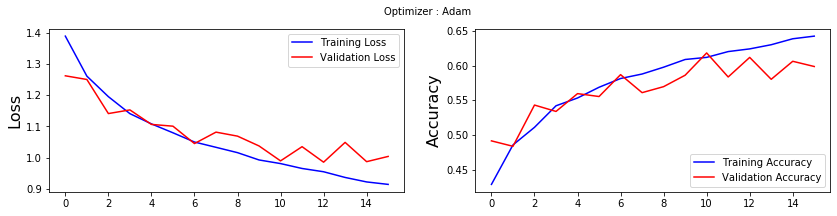

In [33]:
import seaborn as sns
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(res.history['loss'], color='b', label='Training Loss')
plt.plot(res.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(res.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(res.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [29]:
score = model.evaluate(test_pix, test_ind, verbose=0)
score

[1.003440590713907, 0.5987740159034729]

In [1]:
from keras.models import model_from_json
import numpy as np

class FacialExpressionModel(object):
    #0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
    EMOTIONS_LIST = ["Angry", "Disgust","fear","Happy","Sad","surprise", "Neutral"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        print("Model loaded from disk")
        self.loaded_model.summary()

    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)

        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]


if __name__ == '__main__':
    pass

Using TensorFlow backend.


In [ ]:
#code 1
import cv2
import os
import time
from os import listdir
from os.path import isfile, join
#import pygame.color
import numpy as np
import time
import random
import subprocess
from keras.utils import CustomObjectScope
from goto import with_goto
from keras.initializers import glorot_uniform
import pygame


rgb = cv2.VideoCapture(0)
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
mp = 'C:/Program Files (x86)/Windows Media Player/wmplayer.exe'
pygame.init()
pygame.font.init()
pygame.mixer.init()
pred=''
pred1=''


def __get_data__():
    _, fr = rgb.read()
    gray = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
    faces = facec.detectMultiScale(gray, 1.3, 7)
    return faces, fr, gray
def close_window():
    cv2.destroyAllWindows()
    
@with_goto
def start_app(cnn):
    skip_frame = 10
    data = []
    flag = False
    ix = 0
    pred1='a'
    while True:
        label .begin
        ix += 1
        
        faces, fr, gray_fr = __get_data__()
        #print(faces)
        #print(fr)
        #print(gray_fr)
        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]
            
            roi = cv2.resize(fc, (48, 48))
            print("before predicting")
            
            pred = cnn.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
            print("after predicting",pred)
            
            if(pred1==pred and pred1!='a'):
                print("same!!!!!!")
                goto .begin
                #p.poll()
            #pred1=''
            
            #print(pred)
            #time.sleep(0.5)
            if(pred == 'Happy'):
                pred1=pred
                randomfile = random.choice(os.listdir("C:/Users/ACER/Documents/ML-MINIPROJECT/HAPPY-SONGS/"))
                print('You are smiling :) ,I playing special song for you: ' + randomfile)
                #file = ('C:/Users/ACER/Documents/ML-MINIPROJECT/HAPPY-SONGS/' + randomfile)
                file="C:/Users/ACER/Documents/ML-MINIPROJECT/HAPPY-SONGS"
                #DIR="your directory containing mp3- files"
                onlyfiles = [ f for f in listdir(file) if isfile(join(file,f)) ]

                onlywavfiles = []
                for f in onlyfiles:
                    if f[-3:] == "mp3":
                        onlywavfiles.append(f)
                randomnum = random.randint(0,len(onlywavfiles)-1)
                print(randomnum)
                #p=subprocess.call([mp, file])
                #p = vlc.MediaPlayer(file)
                #white = pygame.Color("white")
                #p=subprocess.call(["ffplay", "-nodisp", "-autoexit", file])
                pygame.init()
                pygame.mixer.init()
                pygame.mixer.music.load(file+"/"+onlywavfiles[randomnum])
                pygame.mixer.music.play()
                #while pygame.mixer.music.get_busy(): 
                    #pygame.time.Clock().tick(1)
                time.sleep(0.1) 
                #pygame.quit()

            if(pred == 'Sad'):
                pred1=pred
                randomfile = random.choice(os.listdir("C:/Users/ACER/Documents/ML-MINIPROJECT/SAD-SONGS/"))
                print('You are sad :) ,I playing special song for you: ' + randomfile)
                file = "C:/Users/ACER/Documents/ML-MINIPROJECT/SAD-SONGS"
                onlyfiles = [ f for f in listdir(file) if isfile(join(file,f)) ]

                onlywavfiles = []
                for f in onlyfiles:
                    if f[-3:] == "mp3":
                        onlywavfiles.append(f)
                randomnum = random.randint(0,len(onlywavfiles)-1)
                print(randomnum)
                #p=subprocess.call([mp, file])
                #p = vlc.MediaPlayer(file)
                #white = pygame.Color("white")
                #p=subprocess.call(["ffplay", "-nodisp", "-autoexit", file])
                pygame.init()
                pygame.mixer.init()
                pygame.mixer.music.load(file+"/"+onlywavfiles[randomnum])
                pygame.mixer.music.play()
                #while pygame.mixer.music.get_busy(): 
                    #pygame.time.Clock().tick(1)
                time.sleep(0.1) 
                #pygame.quit()
                #p=subprocess.call(["ffplay", "-nodisp", "-autoexit", file])
            if(pred == 'Angrry'):
                pred1=pred
                randomfile = random.choice(os.listdir("C:/Users/ACER/Documents/ML-MINIPROJECT/AGRY-SONGS/"))
                print('You are angrry :) ,I playing special song for you: ' + randomfile)
                file = ('C:/Users/ACER/Documents/ML-MINIPROJECT/AGRY-SONGS/' + randomfile)
                p=subprocess.call([mp, file])
            #if(pred == 'Neutral'):
               # randomfile = random.choice(os.listdir("C:/Users/ACER/Documents/ML-MINIPROJECT/NEUTRAL-SONGS/"))
                #print('You are neutral :) ,I playing special song for you: ' + randomfile)
                #file = ('C:/Users/ACER/Documents/ML-MINIPROJECT/NEUTRAL-SONGS/' + randomfile)
                #subprocess.call([mp, file])
                
                    
                    

            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

        if cv2.waitKey(1) == 27:
            break
        cv2.imshow('Filter', fr)
    cv2.destroyAllWindows()


if __name__ == '__main__':
    with CustomObjectScope({'GlorotUniform': glorot_uniform()}): model = FacialExpressionModel("model1.json", "chkPt.h5")
    start_app(model)

NameError: name 'color' is not defined

SyntaxError: invalid syntax (windows.py, line 27)

In [4]:
#code2
import cv2
import numpy as np
import os
import random
import signal
import subprocess
import threading
import time
mp = 'C:/Program Files (x86)/Windows Media Player/wmplayer.exe'
happyDir = 'C:/Users/ACER/Documents/ML-MINIPROJECT/HAPPY-SONGS/'
sadDir = 'C:/Users/ACER/Documents/ML-MINIPROJECT/SAD-SONGS/'

rgb = cv2.VideoCapture(0)
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

def __get_data__():
    _, fr = rgb.read()
    gray = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
    faces = facec.detectMultiScale(gray, 1.3, 5)
    return faces, fr, gray

def start_app(cnn):
    skip_frame = 10
    data = []
    flag = False
    ix = 0
    while True:
        ix += 1
        
        faces, fr, gray_fr = __get_data__()
        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]
            
            roi = cv2.resize(fc, (48, 48))
            pred = cnn.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
            playProcess = None


            def printEvenNumbers():
                global playProcess
                for i in range(0, 10, 2):
                    print(i)
                    time.sleep(1)
                os.kill(playProcess.pid, signal.SIGTERM)


            def playSong():
                global playProcess
                if(pred == 'Happy'):
                    randomfile = random.choice(os.listdir(happyDir))
                    print('You are smiling :) ,I playing special song for you: ' + randomfile)
                    file = (happyDir + randomfile)
                else:
                    randomfile = random.choice(os.listdir(sadDir))
                    print('You are sad :) ,I playing special song for you: ' + randomfile)
                    file = (sadDir + randomfile)
                playProcess = subprocess.Popen([mp, file])


            playSong()
            printEvenNumbers()
            
            

            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

        if cv2.waitKey(1) == 27:
            break
        cv2.imshow('Filter', fr)
    cv2.destroyAllWindows()


if __name__ == '__main__':
    model = FacialExpressionModel("model1.json", "chkPt.h5")
    start_app(model)

Model loaded from disk
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_16 (Batc (None, 44, 44, 64)        256       
_________________________________________________________________
activation_19 (Activation)   (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 41, 41, 64)        65600     
_________________________________________________________________
batch_normalization_17 (Batc (None, 41, 41, 64)        256       
_________________________________________________________________
activation_20 (Activation)   (None, 41, 41, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (N

2
4
6
8
You are sad :) ,I playing special song for you: AlbumArt_{B5020207-474E-4720-6129-5B01A3A19A00}_Large.jpg
0
2
4
6
8
You are sad :) ,I playing special song for you: AlbumArtSmall.jpg
0
2
4
6
8
You are sad :) ,I playing special song for you: Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack.mp3
0
2
4
6
8
You are sad :) ,I playing special song for you: AlbumArt_{B5020207-474E-4720-6129-5B01A3A19A00}_Large.jpg
0
2
4
6
8
You are sad :) ,I playing special song for you: AlbumArt_{B5020207-474E-4720-6129-5B01A3A19A00}_Large.jpg
0
2
4
6


KeyboardInterrupt: 

In [11]:
cv2.destroyAllWindows()

In [ ]:
test = youtube_search("spinners")
test